## ARIMA를 활용한 코스피지수 시계열 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'


In [2]:
# from pykrx import stock
# df = stock.get_index_ohlcv_by_date("20150101", "20201231", "1028") #KOSPI코드
# df = df.reset_index()
# print(df.head(2))
# df.to_csv("kospi.csv", index=False)

In [3]:
df = pd.read_csv('./datasets/daily_seoul_air_cond_2020.04.csv')

In [4]:
print(df.shape)
df.rename(columns={"초미세먼지(㎍/㎥)":"초미세먼지"} , inplace=True)
df.head()


(18000, 12)


,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지,오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202004302300,100,도심권,111123,종로구,40,43,21,0.036,0.008,0.3,0.003
1,202004302300,100,도심권,111121,중구,31,41,22,0.037,0.010,0.3,0.003
2,202004302300,100,도심권,111131,용산구,41,40,21,0.035,0.011,0.3,0.002
3,202004302300,101,서북권,111181,은평구,32,37,20,0.053,0.005,0.3,0.003
4,202004302300,101,서북권,111201,마포구,34,34,21,0.043,0.009,0.3,0.002


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   측정일시            18000 non-null  int64  
 1   권역코드            18000 non-null  int64  
 2   권역명             18000 non-null  object 
 3   측정소코드           18000 non-null  int64  
 4   측정소명            18000 non-null  object 
 5   미세먼지 1시간(㎍/㎥)   18000 non-null  int64  
 6   미세먼지 24시간(㎍/㎥)  18000 non-null  int64  
 7   초미세먼지           18000 non-null  int64  
 8   오존(ppm)         18000 non-null  float64
 9   이산화질소농도(ppm)    18000 non-null  float64
 10  일산화탄소농도(ppm)    18000 non-null  float64
 11  아황산가스농도(ppm)    18000 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.6+ MB


In [6]:
df['측정일시'] = pd.to_datetime(df['측정일시'], format="%Y%m%d%H%M")   #202004302300

In [7]:
df.head()

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지,오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,2020-04-30 23:00:00,100,도심권,111123,종로구,40,43,21,0.036,0.008,0.3,0.003
1,2020-04-30 23:00:00,100,도심권,111121,중구,31,41,22,0.037,0.010,0.3,0.003
2,2020-04-30 23:00:00,100,도심권,111131,용산구,41,40,21,0.035,0.011,0.3,0.002
3,2020-04-30 23:00:00,101,서북권,111181,은평구,32,37,20,0.053,0.005,0.3,0.003
4,2020-04-30 23:00:00,101,서북권,111201,마포구,34,34,21,0.043,0.009,0.3,0.002


In [8]:
df['측정소명'].unique()

array(['종로구', '중구', '용산구', '은평구', '마포구', '서대문구', '광진구', '성동구', '강북구',
       '노원구', '중랑구', '동대문구', '도봉구', '성북구', '관악구', '금천구', '영등포구', '구로구',
       '강서구', '양천구', '동작구', '송파구', '강남구', '강동구', '서초구'], dtype=object)

In [9]:
df[df['측정소명']=="중구"][['측정일시',"초미세먼지"]].sort_values('측정일시')

,측정일시,초미세먼지
17977,2020-04-01 00:00:00,24
17951,2020-04-01 01:00:00,24
17927,2020-04-01 02:00:00,26
17901,2020-04-01 03:00:00,34
17876,2020-04-01 04:00:00,45
...,...,...
100,2020-04-30 19:00:00,20
77,2020-04-30 20:00:00,26
52,2020-04-30 21:00:00,18
26,2020-04-30 22:00:00,21


In [10]:
df.groupby('측정소명')["초미세먼지"].mean()

측정소명
강남구     21.201389
강동구     21.323611
강북구     21.226389
강서구     20.219444
관악구     18.019444
광진구     18.956944
구로구     21.086111
금천구     20.373611
노원구     21.018056
도봉구     18.840278
동대문구    17.402778
동작구     22.770833
마포구     19.515278
서대문구    21.123611
서초구     23.025000
성동구     20.327778
성북구     18.493056
송파구     19.719444
양천구     20.848611
영등포구    19.050000
용산구     19.470833
은평구     19.450000
종로구     21.094444
중구      22.404167
중랑구     19.261111
Name: 초미세먼지, dtype: float64

<AxesSubplot:xlabel='측정소명'>

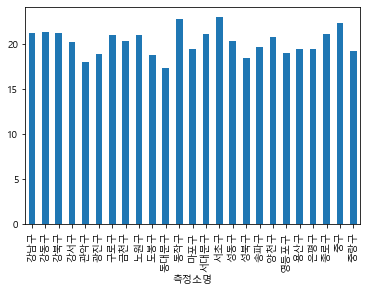

In [11]:
df.groupby('측정소명')["초미세먼지"].mean().plot(kind="bar")

In [12]:
df.groupby(['측정일시','측정소명'])["초미세먼지"].groups

{(2020-04-01 00:00:00, '강남구'): [17997], (2020-04-01 00:00:00, '강동구'): [17998], (2020-04-01 00:00:00, '강북구'): [17981], (2020-04-01 00:00:00, '강서구'): [17993], (2020-04-01 00:00:00, '관악구'): [17991], (2020-04-01 00:00:00, '광진구'): [17982], (2020-04-01 00:00:00, '구로구'): [17992], (2020-04-01 00:00:00, '금천구'): [17990], (2020-04-01 00:00:00, '노원구'): [17988], (2020-04-01 00:00:00, '도봉구'): [17986], (2020-04-01 00:00:00, '동대문구'): [17987], (2020-04-01 00:00:00, '동작구'): [17994], (2020-04-01 00:00:00, '마포구'): [17978], (2020-04-01 00:00:00, '서대문구'): [17979], (2020-04-01 00:00:00, '서초구'): [17999], (2020-04-01 00:00:00, '성동구'): [17985], (2020-04-01 00:00:00, '성북구'): [17983], (2020-04-01 00:00:00, '송파구'): [17996], (2020-04-01 00:00:00, '양천구'): [17995], (2020-04-01 00:00:00, '영등포구'): [17989], (2020-04-01 00:00:00, '용산구'): [17975], (2020-04-01 00:00:00, '은평구'): [17980], (2020-04-01 00:00:00, '종로구'): [17976], (2020-04-01 00:00:00, '중구'): [17977], (2020-04-01 00:00:00, '중랑구'): [17984], (2020-04-01 01:00:00, 

In [13]:
df.groupby(['측정일시','측정소명'])["초미세먼지"].mean()

측정일시                 측정소명
2020-04-01 00:00:00  강남구     25.0
                     강동구     23.0
                     강북구     25.0
                     강서구     24.0
                     관악구     19.0
                             ... 
2020-04-30 23:00:00  용산구     21.0
                     은평구     20.0
                     종로구     21.0
                     중구      22.0
                     중랑구     24.0
Name: 초미세먼지, Length: 18000, dtype: float64

In [14]:
dfp = df.pivot_table(index="측정일시", columns="측정소명", values="초미세먼지")
dfp.head()

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
측정일시,,,,,,,,,,,,,,,,,,,,,
2020-04-01 00:00:00,25,23,25,24,19,19,20,23,27,25,...,22,21,22,25,22,23,21,23,24,23
2020-04-01 01:00:00,25,27,31,25,22,30,22,27,37,28,...,23,23,25,26,25,22,18,24,24,24
2020-04-01 02:00:00,27,27,42,24,24,23,26,28,40,43,...,25,36,25,29,26,25,21,26,26,29
2020-04-01 03:00:00,30,36,56,30,25,42,34,34,47,51,...,29,45,29,34,30,28,23,33,34,41
2020-04-01 04:00:00,34,40,53,36,29,50,34,35,43,52,...,30,44,30,39,31,30,28,38,45,41


<AxesSubplot:xlabel='측정일시'>

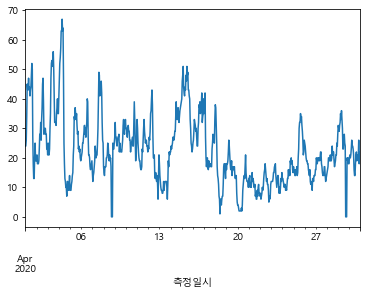

In [15]:
dfp["중구"].plot()

In [16]:
dfp.index.min(),  dfp.index.max()

(Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-30 23:00:00'))

## <font color=red> 시계열 데이터 : 날짜 데이터가 연속적일 경우의 데이터, shuffle 금지 ******</font>

In [17]:
dfp = dfp.sort_index()
dfp["측정일시YMD"] = dfp.index.values.reshape(-1,1)
dfp["측정일시YMD"] = dfp["측정일시YMD"].astype("str").str[:10]
dfp.head()

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,측정일시YMD
측정일시,,,,,,,,,,,,,,,,,,,,,
2020-04-01 00:00:00,25,23,25,24,19,19,20,23,27,25,...,21,22,25,22,23,21,23,24,23,2020-04-01
2020-04-01 01:00:00,25,27,31,25,22,30,22,27,37,28,...,23,25,26,25,22,18,24,24,24,2020-04-01
2020-04-01 02:00:00,27,27,42,24,24,23,26,28,40,43,...,36,25,29,26,25,21,26,26,29,2020-04-01
2020-04-01 03:00:00,30,36,56,30,25,42,34,34,47,51,...,45,29,34,30,28,23,33,34,41,2020-04-01
2020-04-01 04:00:00,34,40,53,36,29,50,34,35,43,52,...,44,30,39,31,30,28,38,45,41,2020-04-01


* 정상성을 갖지 않는다 (평균, 분산이 일정하지 않다)

In [18]:
df = dfp["중구"].copy()

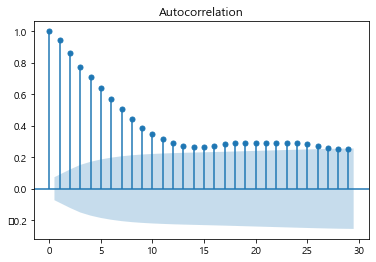

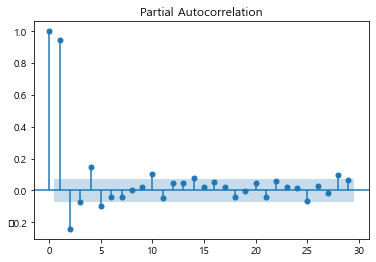

In [19]:
plot_acf(df)
plot_pacf(df)   # Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 15 must be < 15.
plt.show()

* ACF : MA(q) == X
* PACF: AR(p) == 2~5
* 지수 데이터는 AR 모델이 적합하다

# 차분 후 정상성을 띠는지 확인

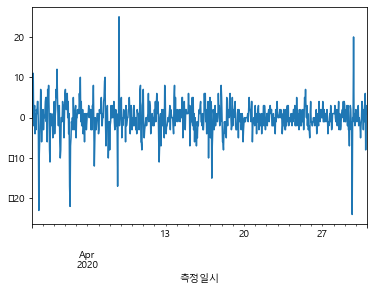

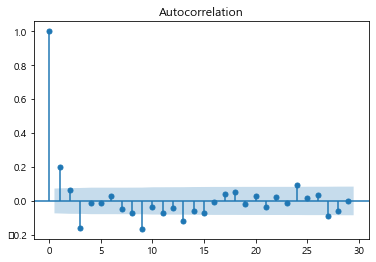

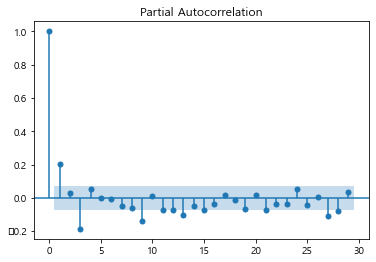

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1 = df.diff(periods=1).iloc[1:]
diff_1.plot()
plt.xticks(rotation =90)
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

* ARIMA(p ,d, q) : 날짜를 1일 차분한 결과 평균이 일정 --> d값 1

* ACF : MA(q) == 1
* PACF: AR(p) == 1
* 해당 데이터는 1차 차분한 데이터를 사용할 경우 :: AR인경우 p값을 1로 MA의 q값을 1로 사용하는 모델이 적합하다


In [21]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

model = ARIMA(df, order=(1,1,1))

arima_res = model.fit(trend='c', full_output=True, disp=1)
print(arima_res.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.중구   No. Observations:                  719
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1977.091
Method:                       css-mle   S.D. of innovations              3.784
Date:                Thu, 21 Oct 2021   AIC                           3962.183
Time:                        16:20:51   BIC                           3980.494
Sample:                    04-01-2020   HQIC                          3969.252
                         - 04-30-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.178     -0.013      0.990      -0.352       0.347
ar.L1.D.중구     0.2461      0.112      2.203      0.028       0.027       0.465
ma.L1.D.중구    -0.0473      0.111     -0.426      0.6

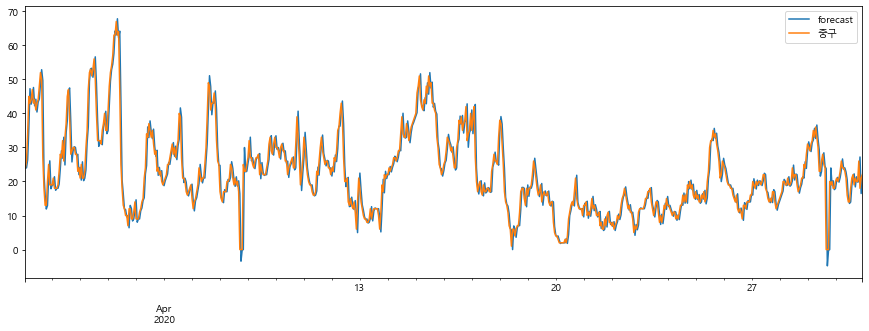

In [22]:
pig, ax = plt.subplots(figsize=(15,5))
arima_res.plot_predict(ax=ax)
plt.show()

# 5일치 예측
<pre>
1465    372.53
1466    372.00
1467    371.55
1468    372.18
1469    366.43

In [32]:
dfp[(dfp["측정일시YMD"]>='2020-04-25') & (dfp["측정일시YMD"]<='2020-04-30')].groupby("측정일시YMD").mean()
dfp.tail() 

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,측정일시YMD
측정일시,,,,,,,,,,,,,,,,,,,,,
2020-04-30 19:00:00,22,21,25,18,17,17,24,19,0,15,...,18,18,17,17,17,18,19,20,20,2020-04-30
2020-04-30 20:00:00,22,20,23,18,20,20,26,21,0,18,...,18,13,18,16,16,22,19,26,19,2020-04-30
2020-04-30 21:00:00,24,20,20,17,24,22,26,24,0,16,...,16,15,18,19,18,19,20,18,20,2020-04-30
2020-04-30 22:00:00,21,20,22,19,23,23,24,22,0,19,...,17,18,20,17,22,19,20,21,21,2020-04-30
2020-04-30 23:00:00,23,24,20,20,20,17,26,22,0,21,...,17,24,21,20,21,20,21,22,24,2020-04-30


In [ ]:
fore = arima_res.forecast(steps=5) # 5일치 맞춰봐 
#  예측값, stderr,   upper bound~lower bound 
# print(fore)
print('5일 예측지수', np.array(fore[0])/1000 * 1000)
print('실제평균', np.array([20,26,18,21,22]).mean())
print('예측평균', (np.array(fore[0])/1000 * 1000).mean())

5일 예측지수 [22.22172547 22.2745413  22.2857865  22.28680068 22.28529688]
실제평균 30.6
예측평균 22.270830164384
